# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
!pip install folium

In [2]:
!pip install geopandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import json

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [8]:
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]

In [12]:
sinasc_2 = sinasc_raw[['PESO', 'SEXO', 'DTNASC', 'ESCMAE']]

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [16]:
sinasc_1.pivot_table(index= 'munResNome', values=['IDADEMAE', 'IDADEPAI']).round()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,26.0,30.0
Alto Alegre dos Parecis,25.0,29.0
Alto Paraíso,25.0,29.0
Alvorada D'Oeste,26.0,31.0
Ariquemes,26.0,32.0
Buritis,26.0,31.0
Cabixi,26.0,34.0
Cacaulândia,26.0,36.0
Cacoal,27.0,31.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [19]:
sinasc_2.loc[:, 'DTNASC'] = pd.to_datetime(sinasc_2['DTNASC'])

In [21]:
dados_filtrados = sinasc_2[sinasc_2['DTNASC'] == '2019-11-21']
resultado = dados_filtrados.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index().round()
resultado

,SEXO,ESCMAE,PESO


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [24]:
# Qual o município que nasceu menos bebês em 2019?
sinasc_raw['munResNome'].value_counts(ascending=True)

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Col

In [26]:
print('O município com menos bebês é Castanheiras, com 32.')

O município com menos bebês é Castanheiras, com 32.


In [28]:
# Qual a idade media, maxima, minima das maes nesse municipio?
sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'][['IDADEMAE']].agg(['mean', 'min', 'max']).round()

,IDADEMAE
mean,27.0
min,17.0
max,39.0


In [30]:
# Qual a idade media, maxima, minima dos pais nesse municipio?
sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'][['IDADEPAI']].agg(['mean', 'min', 'max']).round()

,IDADEPAI
mean,30.0
min,17.0
max,43.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [33]:
# Qual o municipio que nasceu mais bebês no mês de março?

sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

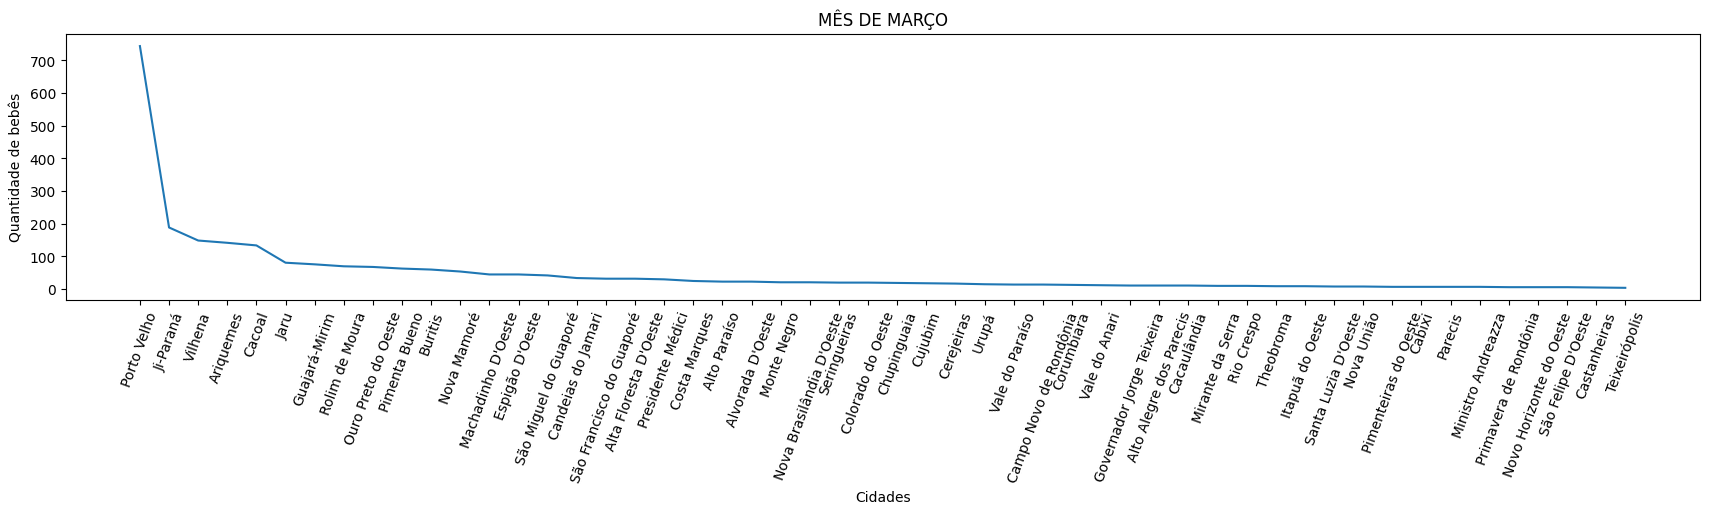

O município com mais nascimento é Porto Velho.


In [35]:
nascimentos_por_municipio = marco['munResNome'].value_counts()

fig, ax = plt.subplots(figsize=[17,5])
nascimentos_por_municipio.plot(ax=ax)
ax.set_xticks(range(len(nascimentos_por_municipio.index)))
ax.set_xticklabels(nascimentos_por_municipio.index, rotation=70)
plt.tight_layout()
plt.title('MÊS DE MARÇO')
plt.xlabel('Cidades')
plt.ylabel('Quantidade de bebês')
plt.show()

print('O município com mais nascimento é Porto Velho.')

In [36]:
# Qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
marco[marco['munResNome'] == 'Porto Velho'][['QTDFILVIVO']].agg(['mean', 'min', 'max']).round()

,QTDFILVIVO
mean,1.0
min,0.0
max,9.0


In [37]:
# Qual a idade media, maxima, minima dos pais nesse municipio?
marco[marco['munResNome'] == 'Porto Velho'][['IDADEPAI']].agg(['mean', 'min', 'max']).round()

,IDADEPAI
mean,35.0
min,19.0
max,62.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

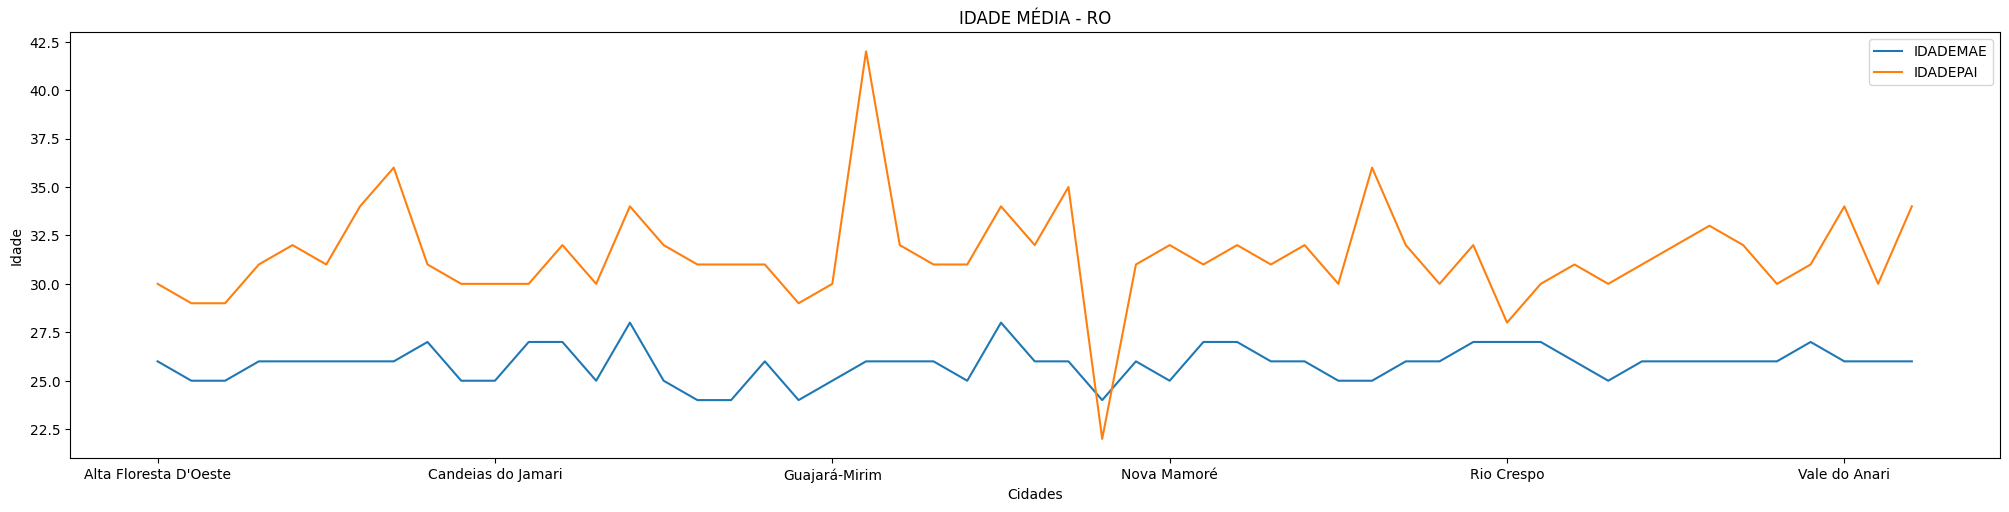

Podemos constatar que a idade média dos pais é superior ao das mães na maioria das cidades.


In [43]:
grafico = sinasc_1.pivot_table(index= 'munResNome', values=['IDADEMAE', 'IDADEPAI']).round()

grafico.plot(figsize=[20,5])
plt.tight_layout()
plt.title('IDADE MÉDIA - RO')
plt.xlabel('Cidades')
plt.ylabel('Idade')
plt.show()

print('Podemos constatar que a idade média dos pais é superior ao das mães na maioria das cidades.')

In [45]:
mapa_ro = gpd.read_file('RO_Municipios_2023.shp')

In [88]:
import unidecode

sinasc_raw['munResNome'] = sinasc_raw['munResNome'].str.upper().apply(unidecode.unidecode)
mapa_ro['NM_MUN'] = mapa_ro['NM_MUN'].str.upper().apply(unidecode.unidecode)

In [92]:
dados_nascimentos = sinasc_raw['munResNome'].value_counts().reset_index()
dados_nascimentos.columns = ['NM_MUN', 'nascimentos'] 
mapa_com_dados = mapa_ro.merge(dados_nascimentos, on='NM_MUN', how='left')

from folium import Choropleth

mapa = folium.Map(location=[-10.9, -63.5], zoom_start=12)

Choropleth(
    geo_data=mapa_com_dados,
    data=mapa_com_dados,
    columns=['NM_MUN', 'nascimentos'],  # <- aqui está a mudança
    key_on='feature.properties.NM_MUN',  # <- e aqui
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Nascimentos por Município - RO (2019)'
).add_to(mapa)

mapa

### **INSIGHT** ###

Pelo mapa, podemos concluir que o norte de Rondônia possui a maior escala de nascimentos de bebês.

In [63]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [65]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [67]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')